# Linear Discriminant Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
# get the data
penguins = pd.read_csv('penguins_size.csv').dropna()
penguins.head()

# we only take the first two features to make it more challenging 
X = penguins[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','body_mass_g']].values

# scale the features to make interpretation easier of the LDA components
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

le = LabelEncoder()
y = le.fit_transform(penguins['species'])

In [3]:
# split the data into train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [4]:
# Performance without LDA
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy:',accuracy_score(y_pred,y_test))
# Comment: logistic regression without LDA does struggles to converge

Accuracy: 0.9880952380952381


In [12]:
# Run one-dimensional LDA (Fisher)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
#
# Documentation is here:
# https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html
#
lda = LDA(n_components=1)
X_train1 = lda.fit_transform(X_train,y_train)

# Performance after LDA
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train1, y_train)
y_pred = model.predict(lda.transform(X_test))
print('Accuracy:',accuracy_score(y_pred,y_test))

Accuracy: 0.8571428571428571


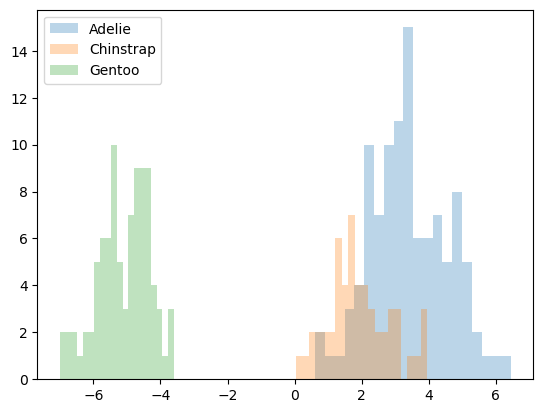

In [13]:
# plot the Discriminant dimension
kwargs = dict(histtype='stepfilled', alpha=0.3, density=False, bins=20)
plt.hist(X_train1[y_train==0], **kwargs)
plt.hist(X_train1[y_train==1], **kwargs)
plt.hist(X_train1[y_train==2], **kwargs)
plt.legend(le.classes_)

In [46]:
# --->>> Your turn <<<---
# Use LDA to reduce the dataset to two dimensions,
# and check how well the linear regression model works on the reduced dataset.

In [47]:
# Using LDA for dimensionality reduction
lda = LDA(n_components=2)
X_train2 = lda.fit_transform(X_train,y_train)

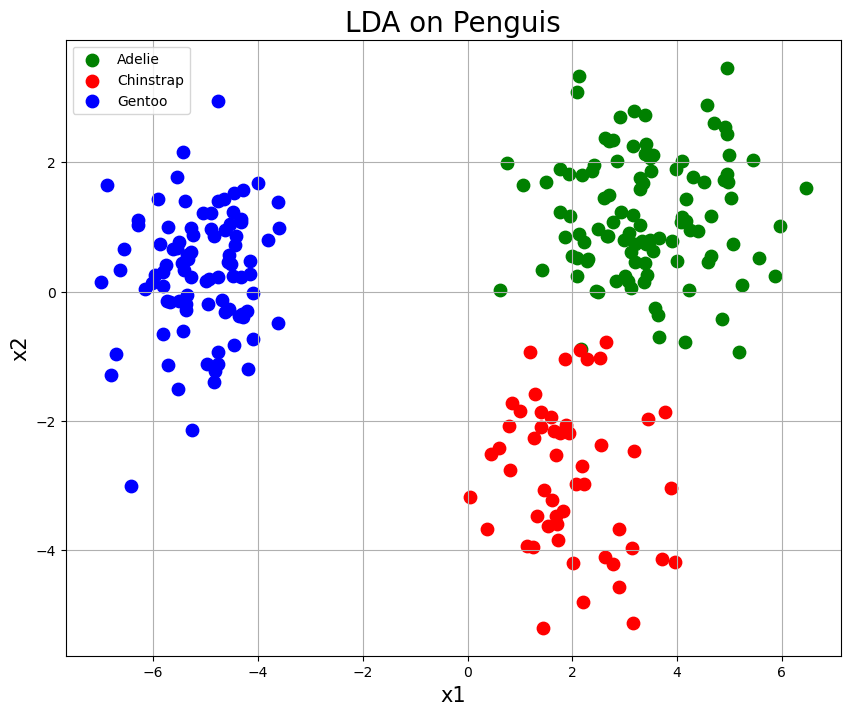

In [48]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('x1', fontsize = 15)
ax.set_ylabel('x2', fontsize = 15)
ax.set_title('LDA on Penguis', fontsize = 20)
targets = penguins['species'].unique()
colors = ['g', 'r', 'b']
for target, color in zip(np.unique(y_train),colors):
    indicesToKeep = (y_train == target)
    ax.scatter(X_train2[indicesToKeep, 0]
               , X_train2[indicesToKeep, 1]
               , c = color
               , s = 80)
ax.legend(targets)
ax.grid()

In [49]:
# Performance after LDA
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train2, y_train)
y_pred = model.predict(lda.transform(X_test))
print('Accuracy:',accuracy_score(y_pred,y_test))

Accuracy: 0.9880952380952381


In [ ]:
# print components of the two LDA dimensions
print(lda.scalings_)
# add the labels of the original features
feature_names = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm','body_mass_g']
for i, comp in enumerate(lda.scalings_.T):
    print(f"LD-{i+1}:")
    for j, c in enumerate(comp):
        print(f"   {feature_names[j]}: {c:.4f}")

[[-0.6447785  -2.40547023]
 [ 2.18247722  0.04229967]
 [-1.0100861   0.44190046]
 [-1.04326267  1.25362342]]
LD-1:
   culmen_length_mm: -0.6448
   culmen_depth_mm: 2.1825
   flipper_length_mm: -1.0101
   body_mass_g: -1.0433
LD-2:
   culmen_length_mm: -2.4055
   culmen_depth_mm: 0.0423
   flipper_length_mm: 0.4419
   body_mass_g: 1.2536


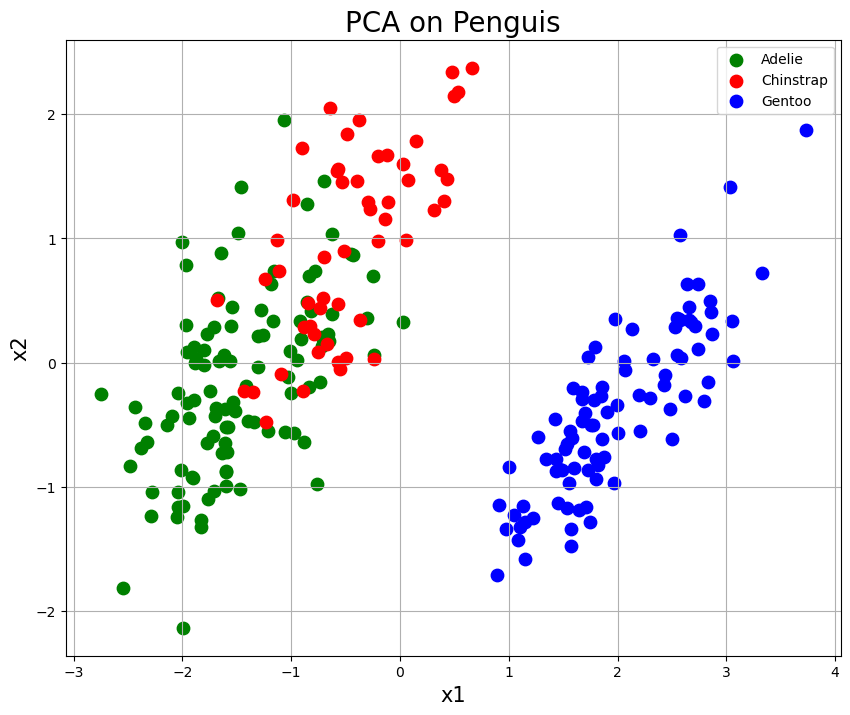

In [51]:
# comparison to PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('x1', fontsize = 15)
ax.set_ylabel('x2', fontsize = 15)
ax.set_title('PCA on Penguis', fontsize = 20)
targets = penguins['species'].unique()
colors = ['g', 'r', 'b']
for target, color in zip(np.unique(y_train),colors):
    indicesToKeep = (y_train == target)
    ax.scatter(X_train_pca[indicesToKeep, 0]
               , X_train_pca[indicesToKeep, 1]
               , c = color
               , s = 80)
ax.legend(targets)
ax.grid()